In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
sns.set_context('poster')
from nltk.util import flatten

In [55]:
df=pd.read_csv('structured.csv')
df.head(5)

,hotel_name,review_summary,score,review
0,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye..."
1,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye..."
2,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye..."
3,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye..."
4,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye..."


In [56]:
df.shape

(4000, 4)

In [71]:
df.dropna(subset=['review_summary'],inplace=True)


In [72]:
df.isnull().sum()

hotel_name        0
review_summary    0
score             0
review            0
dtype: int64

# Checking Frequency of Words and Phrases in Review Summaries

# Using the FreqDist function in the ntlk library I plotted a graph with the most frequent words and phrases in both columns.
Stopwords were removed to capture the more meaningful words.

In [73]:
flat_review_summary = " ".join(df['review_summary'].values)
#I flattened the review summary:



In [74]:
flat_list_review_summaries = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review_summary)

for review in tokenized_reviews:
    flat_list_review_summaries.append(review.lower())

In [75]:
stop_words = stopwords.words("english")

flat_list_review_summaries_no_stop = [word for word in flat_list_review_summaries if word not in stop_words]

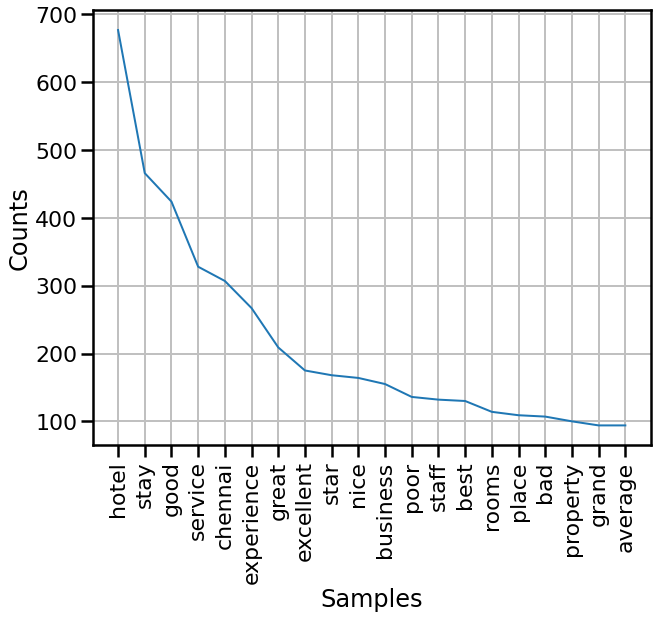

In [76]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(flat_list_review_summaries_no_stop).plot(20)
plt.show()

In [77]:
# Removing Unmeaningful Words 1st Attempt

In [78]:
# I had noticed a lot of the most frequent words in the review text happened to be
# words with no sentimental impact, so I iteratively removed unmeaningful words 
# such as 'room', 'hotel', 'hilton' etc. I did this as a precaution,
# as some of these words may impact my model accuracies.

In [79]:
for word in ['hotel','stay','hilton','location','room','service','airport','staff','london','night','flight','overnight','rooms']:
    stop_words.append(word)
    
    # lot  of common words used  normally

In [80]:
flat_list_review_summaries_no_stop_2 =  [word for word in flat_list_review_summaries_no_stop if word not in stop_words]

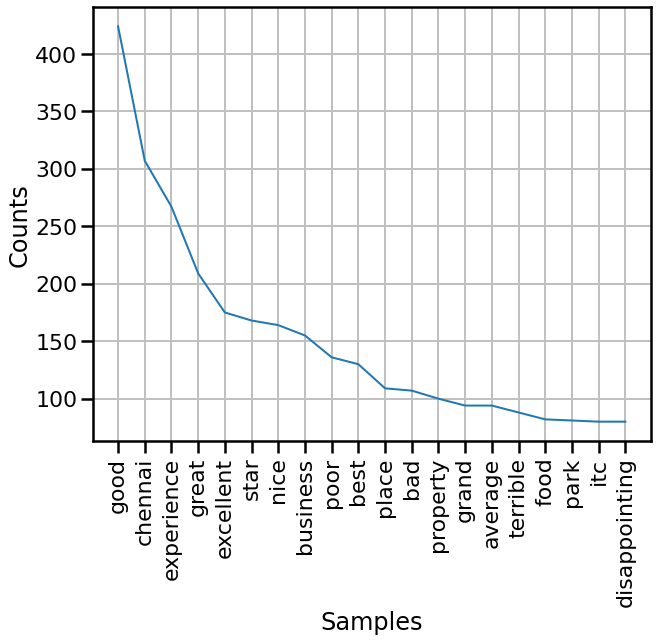

In [81]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_2).plot(20)
plt.show()

In [82]:
# Again removing  the unmeanigful words  to make more accurate predcitrions

In [83]:
for word in ['experience','gatwick','ever','holiday','one']:
    stop_words.append(word)

In [84]:
flat_list_review_summaries_no_stop_3 =  [word for word in flat_list_review_summaries_no_stop_2 if word not in stop_words]

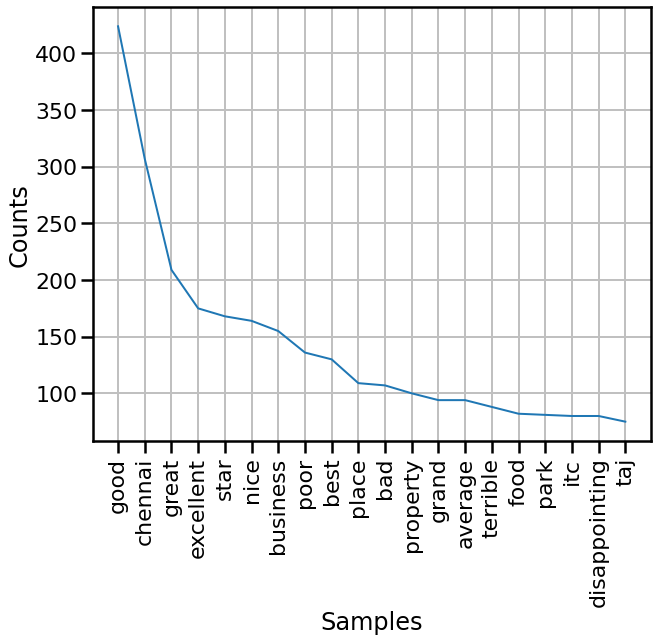

In [85]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_3).plot(20)
plt.show()

# Word cloud summary for the reveiw summary

In [86]:
flat_clean_sum_str = " ".join(flat_list_review_summaries_no_stop_3)

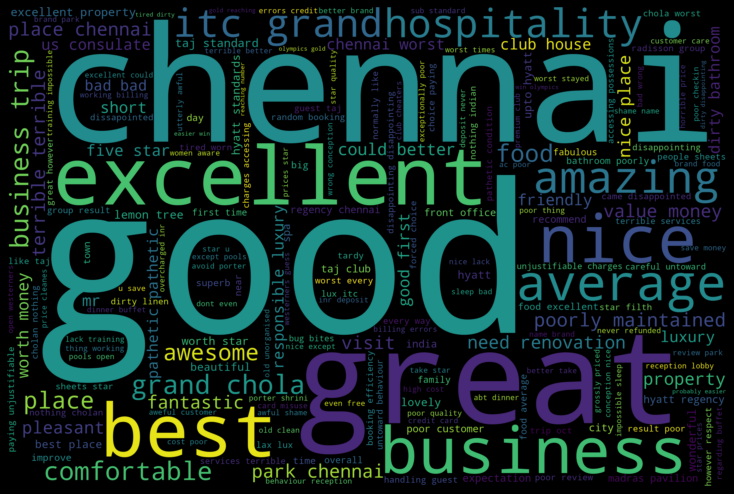

In [87]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Checkiing the frquency of the wods and pharases in the reviews

In [89]:
flat_review = " ".join(df['review'].values)

In [90]:
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review)

for review in tokenized_reviews:
    flat_list_reviews.append(review.lower())

In [91]:
flat_list_reviews_no_stop = [word for word in flat_list_reviews if word not in stop_words]

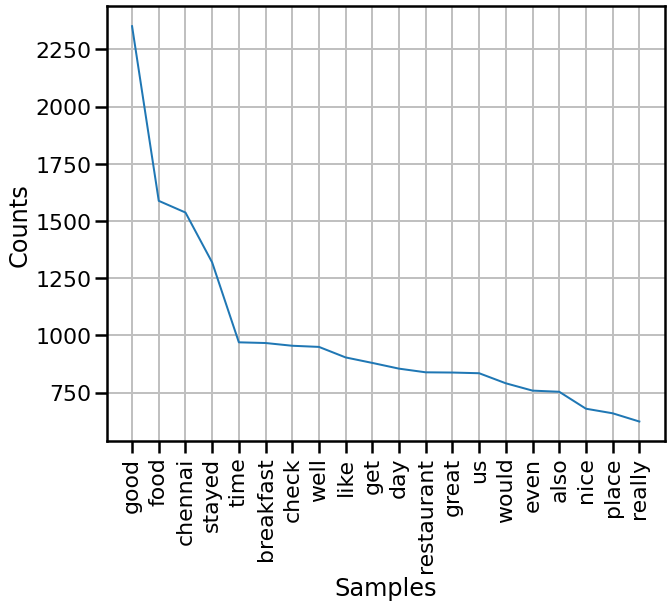

In [92]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop).plot(20)
plt.show()

In [93]:
# REmoving the words 1st attempt

In [94]:
for word in ['stayed','would','breakfast','bed','check','get','us','time','reception','terminal','bar','food','booked','walk','bathroom']:
    stop_words.append(word)

In [95]:
flat_list_reviews_no_stop_2 =  [word for word in flat_list_reviews if word not in stop_words]

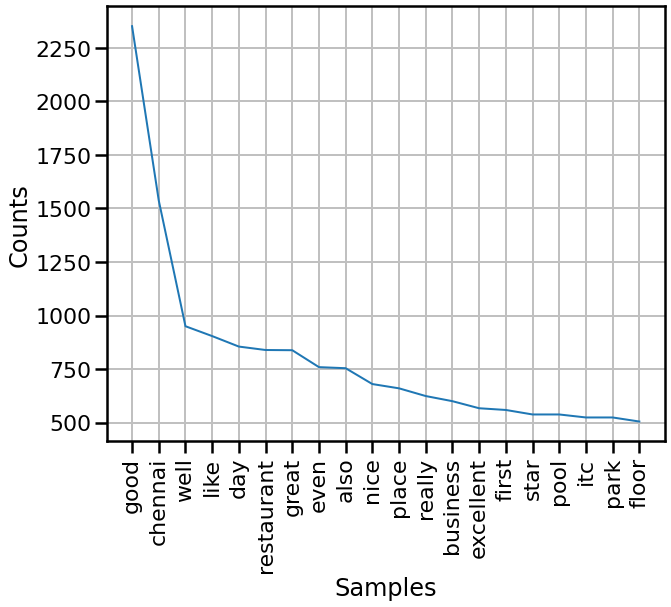

In [96]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_2).plot(20)
plt.show()

In [97]:
for word in ['really','early','could','also','restaurant','morning','even','floor','next','back','day','two']:
    stop_words.append(word)

In [98]:
flat_list_reviews_no_stop_3 = [word for word in flat_list_reviews_no_stop_2 if word not in stop_words]

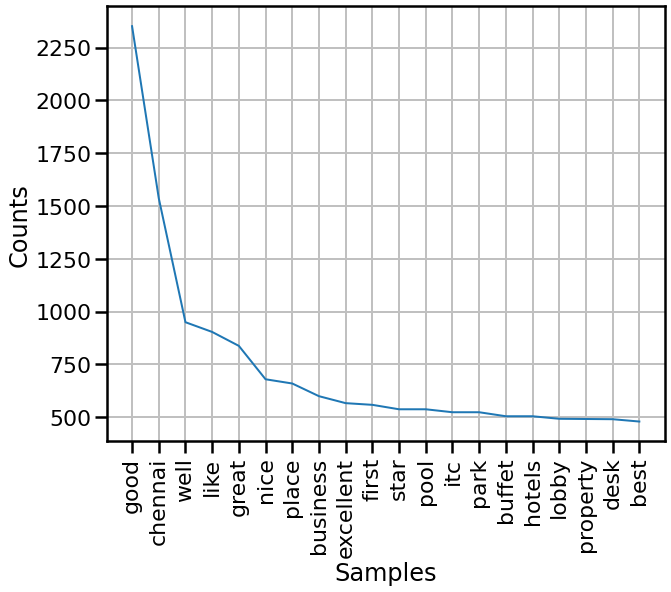

In [99]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_3).plot(20)
plt.show()

In [100]:
# Removing Unmeaningful Words 3rd Attempt

In [101]:
for word in ['got','executive','south','shower','first','long','need','area']:
    stop_words.append(word)

In [102]:
flat_list_reviews_no_stop_4 = [word for word in flat_list_reviews_no_stop_3 if word not in stop_words]

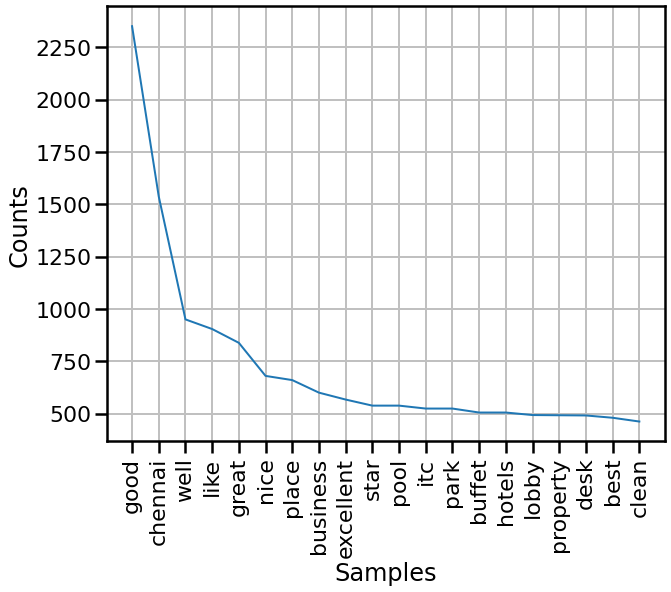

In [103]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_4).plot(20)
plt.show()

In [105]:
# 4 Removing Unmeaningful Words 4th Attempt

In [106]:
for word in ['minutes','lounge','went','much','told','sleep']:
    stop_words.append(word)

In [107]:
flat_list_reviews_no_stop_5 = [word for word in flat_list_reviews_no_stop_4 if word not in stop_words]

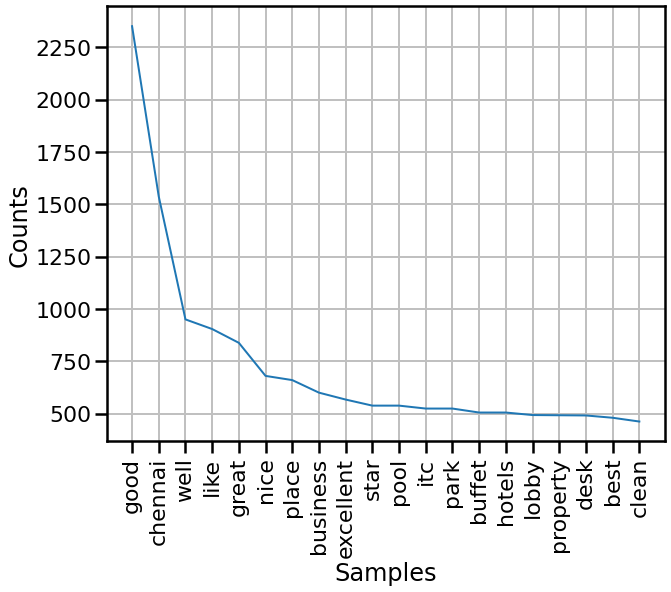

In [108]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_5).plot(20)
plt.show()

In [109]:
# Removing Unmeaningful Words 5th Attempt

In [110]:
for word in ['arrived','hotels','work','station','nights','beds']:
    stop_words.append(word)

In [111]:
flat_list_reviews_no_stop_6 = [word for word in flat_list_reviews_no_stop_5 if word not in stop_words]

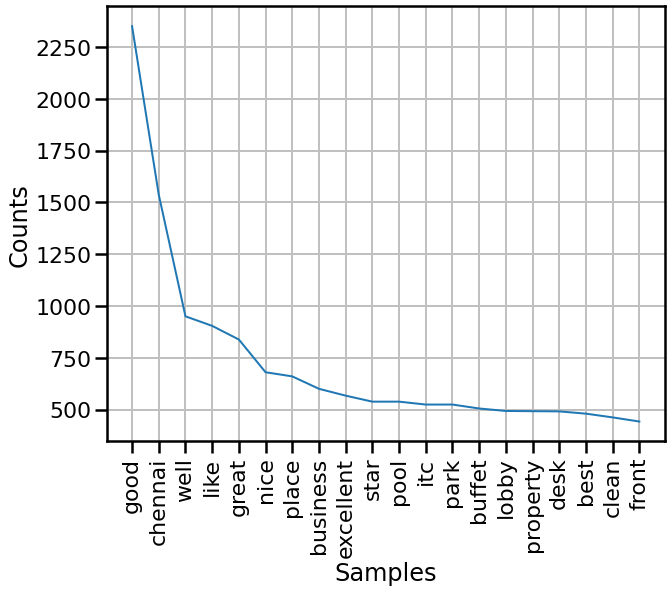

In [112]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_6).plot(20)
plt.show()

In [113]:
# 6 Removing Unmeaningful Words 6th Attempt

In [115]:
for word in ['quite','bit','go','people','car']:
    stop_words.append(word)

In [116]:
flat_list_reviews_no_stop_7 = [word for word in flat_list_reviews_no_stop_6 if word not in stop_words]

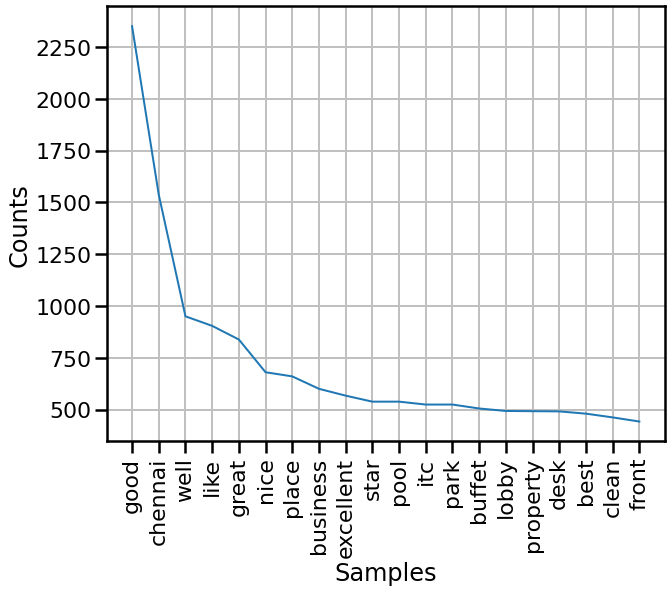

In [117]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_7).plot(20)
plt.show()

In [119]:
flat_clean_str = " ".join(flat_list_reviews_no_stop_6)

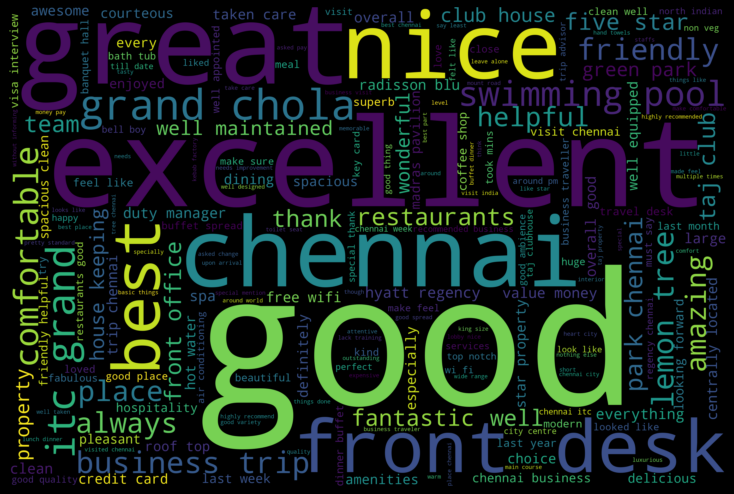

In [120]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Stemming and Lemming

To narrow down the feature words I applied stemmation and lemmitisation 
to both the reviews and 
review summaries.

In [121]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [127]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [130]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Avinish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [131]:
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

df['review_summary_stemmed'] = df['review_summary'].apply(apply_stem)
df['review_summary_lemmed'] = df['review_summary'].apply(apply_lem)

In [132]:
review_index_to_check = 1013
print("ORIGINAL REVIEW SUMMARY:",'\n',df['review_summary'].iloc[review_index_to_check],'\n')
print("ORIGINAL REVIEW:",'\n',df['review'].iloc[review_index_to_check],'\n')
print("STEMMED REVIEW SUMMARY:",'\n',df['review_summary_stemmed'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW SUMMARY:",'\n',df['review_summary_lemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW SUMMARY: 
 a blemish to my great Indian trip 

ORIGINAL REVIEW: 
 i have been hopping between cities in India for the past week and i must say that my stay at the Park Hotel in Chennai was the low point for my trip. The hotel needs a serious renovation, it stinks, floors are squeaky, the night club opposite the reception area is such a shocker - basically now that i have stayed there i will discourage any of my friends and people i know never to ever consider it if they ever find themselves in Chennai.  I do believe that the Park Hotel brand can do something to rehabilitate this hotel.… 

STEMMED REVIEW SUMMARY: 
 a blemish to my great indian trip  

STEMMED REIVEW: 
 i have been hop between citi in india for the past week and i must say that my stay at the park hotel in chennai wa the low point for my trip. the hotel need a seriou renovation, it stinks, floor are squeaky, the night club opposit the recept area is such a shocker - basic now that i have stay there i will

# Stemmation had broken down some words into words that don't exist, 
whereas lemmitisation had simplified adjectives and verbs to their root form.
I chose to continue with the lemmitised version of the texts
for further processing.

In [133]:
df.head()

,hotel_name,review_summary,score,review,review_stemmed,review_lemmed,review_summary_stemmed,review_summary_lemmed
0,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye...","hi, My name is vijay jung thapa - and I stay ...","Hi, My name be Vijay Jung Thapa - and I stay ...",grand chola is the worst ever in everi way,Grand Chola be the bad ever in every way
1,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye...","hi, My name is vijay jung thapa - and I stay ...","Hi, My name be Vijay Jung Thapa - and I stay ...",grand chola is the worst ever in everi way,Grand Chola be the bad ever in every way
2,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye...","hi, My name is vijay jung thapa - and I stay ...","Hi, My name be Vijay Jung Thapa - and I stay ...",grand chola is the worst ever in everi way,Grand Chola be the bad ever in every way
3,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye...","hi, My name is vijay jung thapa - and I stay ...","Hi, My name be Vijay Jung Thapa - and I stay ...",grand chola is the worst ever in everi way,Grand Chola be the bad ever in every way
4,"ITC Grand Chola, Chennai - a Luxury Collection...",Grand Chola is the worst ever in every way,1,"Hi, My name is Vijay Jung Thapa - and I staye...","hi, My name is vijay jung thapa - and I stay ...","Hi, My name be Vijay Jung Thapa - and I stay ...",grand chola is the worst ever in everi way,Grand Chola be the bad ever in every way


# Train and test split of the data

Prior to vectorising the current dataset,
I did a train, test split to save the test data for after modelling.

In [139]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['hotel_name','score']),df['score'],test_size=0.2,random_state=42)
                                    

In [142]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test.shape)

(3196, 6)
(3196,)
(799,)
(799,)


In [143]:
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_train_df.head()

,score
0,4
1,2
2,1
3,5
4,5


# TF-IDF Vectorisation for Reviews

In [148]:
tokenizer_summary = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect_summary = TfidfVectorizer(lowercase=True, 
                                      tokenizer = tokenizer_summary.tokenize, 
                                      stop_words=stop_words, 
                                      ngram_range=(1,2),
                                      min_df = 0.01)

x_lemm_train_summary_tfidf_sparse = tf_idf_vect_summary.fit_transform(x_train['review_summary_lemmed'])

x_lemm_test_summary_tfidf_sparse = tf_idf_vect_summary.transform(x_test['review_summary_lemmed'])


x_lemm_train_summary_tfidf = pd.DataFrame(x_lemm_train_summary_tfidf_sparse.toarray(), 
                                          columns=tf_idf_vect_summary.get_feature_names())

x_lemm_test_summary_tfidf = pd.DataFrame(x_lemm_test_summary_tfidf_sparse.toarray(), 
                                         columns=tf_idf_vect_summary.get_feature_names())


x_lemm_train_summary_tfidf.head()

,amazing,average,bad,best,brand,business,chennai,chola,clean,comfortable,...,property,review,standards,star,taj,terrible,trip,visit,worst,worth
0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.736719,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.612572,0.0,0.0,0.490753,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.564622,0.0,0.0,0.452339,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Joining Reviews With Review Summaries

In [149]:
x_lemm_summary_train_text = x_lemm_train_summary_tfidf.join(x_lemm_train_tfidf, lsuffix='_sum')
x_lemm_summary_test_text = x_lemm_test_summary_tfidf.join(x_lemm_test_tfidf, lsuffix='_sum')
x_lemm_summary_train_text.head()

,amazing,average_sum,bad_sum,best_sum,brand,business_sum,chennai_sum,chola_sum,clean_sum,comfortable_sum,...,try,use,visit,wait,want,water,way,week,welcome,well
0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.000000,0.215472,0.000000,0.0,0.0,0.0,0.0,0.0,0.358855
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.736719,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.239727,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.612572,0.0,0.0,0.490753,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.437238,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.564622,0.0,0.0,0.452339,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [150]:
print(x_lemm_summary_train_text.shape)
print(x_lemm_summary_test_text.shape)
print(y_train.shape)
print(y_test.shape)

(3196, 157)
(799, 157)
(3196,)
(799,)


# Saving Preprocessed Dataset as CSVs

<!-- 

Using the lemmed texts for review and review summary I used TF-IDF vectorisation with an ngram range of 2, leaving me with a vectorised dataset with 138 words and phrases (112 from reviews and 26 from review summaries). I then saved the x and y data in separate csv files for modelling. -->

In [152]:
x_lemm_summary_train_text.to_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/x_train_data.csv',index=False)

In [153]:
x_lemm_summary_test_text.to_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/x_test_data.csv',index=False)

In [154]:
y_train_df.to_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/y_train_data.csv',index=False)

In [155]:
y_test_df.to_csv('C:/Users/Avinish/Desktop/scapy/nlp/nlp/spiders/y_test_data.csv',index=False)